<a href="https://colab.research.google.com/github/sidds4474/Play-Store-App-Review-Analysis/blob/main/Play_Store_App_Review_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [163]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [164]:
import pandas as pd

In [165]:
# Function to read data from google drive

def read_data(filename):
  data=pd.read_csv(filename)
  return data

In [229]:
filename = '/content/drive/MyDrive/Play Store App Review Analysis - Capstone Project/User Reviews.csv'
data_review=read_data(filename)
data_review.head(-5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64285,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64286,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64287,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64288,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [167]:
filename = '/content/drive/MyDrive/Play Store App Review Analysis - Capstone Project/Play Store Data.csv'
data=read_data(filename)
data.head(-5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10832,FR Tides,WEATHER,3.8,1195,582k,"100,000+",Free,0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up


In [168]:
def get_stats(data):
  print('\n')
  print(data.info())
  print('\n')
  print('Shape of dataFrame is {} \n'.format(data.shape))
  print('\n')
  print('Missing Values are:\n')
  print(data.isnull().sum())
  print('\n')
  print('Data Types of feature are: \n')
  print(data.dtypes)


In [169]:
get_stats(data)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None


Shape of dataFrame is (10841, 13) 



Missing Values are:

App                  0
Category             0
Rating            1474
Reviews              0
Siz

In [170]:
data[data['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [171]:
data.iloc[10472,1:]=data.iloc[10472,1:].shift(1)

In [172]:
data.iloc[10472,:]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              NaN
Rating                                                1.9
Reviews                                              19.0
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

In [173]:
data['Last Updated']=pd.to_datetime(data['Last Updated'])
data['Last Updated'].dtype

dtype('<M8[ns]')

In [174]:
data['Year Added']=data['Last Updated'].dt.year
data['Month Added']=data['Last Updated'].dt.month

In [175]:
data.head(-5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year Added,Month Added
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018,8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,2018,6
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2018,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,2018-06-13,2.0.148.0,4.0 and up,2018,6
10832,FR Tides,WEATHER,3.8,1195,582k,"100,000+",Free,0,Everyone,Weather,2014-02-16,6.0,2.1 and up,2014,2
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,"1,000+",Free,0,Everyone,Books & Reference,2014-03-23,0.8,2.2 and up,2014,3
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,2017-06-18,1.0.0,4.1 and up,2017,6


In [176]:
# Type of service people like to use Free or Paid ?
data['Type'].isna().sum()

1

In [177]:
data.dropna(subset=['Type'],inplace=True)

In [178]:
data['Type'].isna().sum()

0

In [179]:
data['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [180]:
labels=data['Type'].value_counts().index
values=data['Type'].value_counts().values

In [181]:
!pip install plotly

In [182]:
import plotly.express as px

In [183]:
fig=px.pie(names=labels,values=values)
fig.show(renderer="colab")

In [184]:
df1=data[data['Type']=='Free']
df2=data[data['Type']=='Paid']

In [185]:
free=df1['Year Added'].value_counts().reset_index()
free

,index,Year Added
0,2018,7004
1,2017,1684
2,2016,710
3,2015,377
4,2014,150
5,2013,81
6,2012,21
7,2011,12
8,2010,1


In [186]:
free.columns=['year','count']
free

,year,count
0,2018,7004
1,2017,1684
2,2016,710
3,2015,377
4,2014,150
5,2013,81
6,2012,21
7,2011,12
8,2010,1


In [187]:
paid=df2['Year Added'].value_counts().reset_index()

In [188]:
paid.columns=['year','count']
paid

,year,count
0,2018,345
1,2017,183
2,2016,94
3,2015,82
4,2014,59
5,2013,29
6,2012,5
7,2011,3


In [189]:
row={'year':2010,'count':0}
paid=paid.append(row,ignore_index=True)
paid

,year,count
0,2018,345
1,2017,183
2,2016,94
3,2015,82
4,2014,59
5,2013,29
6,2012,5
7,2011,3
8,2010,0


In [190]:
!pip install chart_studio

In [191]:
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px
import chart_studio.plotly as py
import numpy as np
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

In [192]:
def stats(dataframe,feature,column1,column2):
  df=dataframe[feature].value_counts().reset_index()
  df.columns=[column1,column2]
  return df

In [193]:
stats(df1,'Year Added','year','count')

,year,count
0,2018,7004
1,2017,1684
2,2016,710
3,2015,377
4,2014,150
5,2013,81
6,2012,21
7,2011,12
8,2010,1


In [194]:
def need_visual(df1=None,df2=None,column1=None,column2=None,dict_title=None,visual='scatter'):
  if visual=='scatter':
    trace1=go.Scatter(x=df1[column1],y=df1[column2])
    trace2=go.Scatter(x=df2[column1],y=df2[column2])
    y=[trace1,trace2]
    layout=dict_title
    fig=go.Figure(data=y,layout=layout)
    return fig.show(renderer="colab")

  elif visual=='bar': 
    fig=px.bar(df1,x=column1,y=column2) 
    return fig.show(renderer="colab")

In [195]:
free=stats(df1,'Year Added','year','count')
free

,year,count
0,2018,7004
1,2017,1684
2,2016,710
3,2015,377
4,2014,150
5,2013,81
6,2012,21
7,2011,12
8,2010,1


In [196]:
paid=stats(df2,'Year Added','year','count')
paid

,year,count
0,2018,345
1,2017,183
2,2016,94
3,2015,82
4,2014,59
5,2013,29
6,2012,5
7,2011,3


In [197]:
row={'year':2010,'count':0}

In [198]:
paid=paid.append(row,ignore_index=True)
paid

,year,count
0,2018,345
1,2017,183
2,2016,94
3,2015,82
4,2014,59
5,2013,29
6,2012,5
7,2011,3
8,2010,0


In [199]:
need_visual(free,paid,'year','count')

In [200]:
df1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Year Added', 'Month Added'],
      dtype='object')

In [201]:
output=stats(df1,'Month Added','month','count')

In [202]:
need_visual(df1=output,column1='month',column2='count',visual='bar')

In [203]:
# Google is bias or not
output3=stats(df1,'Content Rating','users','count')
output4=stats(df2,'Content Rating','users','count')

In [204]:
need_visual(output3,output4,'users','count')

In [205]:
df1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Year Added', 'Month Added'],
      dtype='object')

In [206]:
df1['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4.0, nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5.0, 3.0, 1.9, 2.5, 2.8, 2.7,
       1.0, 2.9, 2.3, 2.6, 2.2, 1.7, 2.0, 2.4, 1.8, 1.6, 2.1, 1.4, 1.5,
       1.2, '1.9'], dtype=object)

In [207]:
df1['Rating'].replace('1.9',1.9,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [208]:
df1['Rating'].dtype

dtype('float64')

In [209]:
df1['Rating'].unique()


array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.6, 2.2, 1.7, 2. , 2.4, 1.8, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [210]:
df1['Rating'].isna().sum()

1320

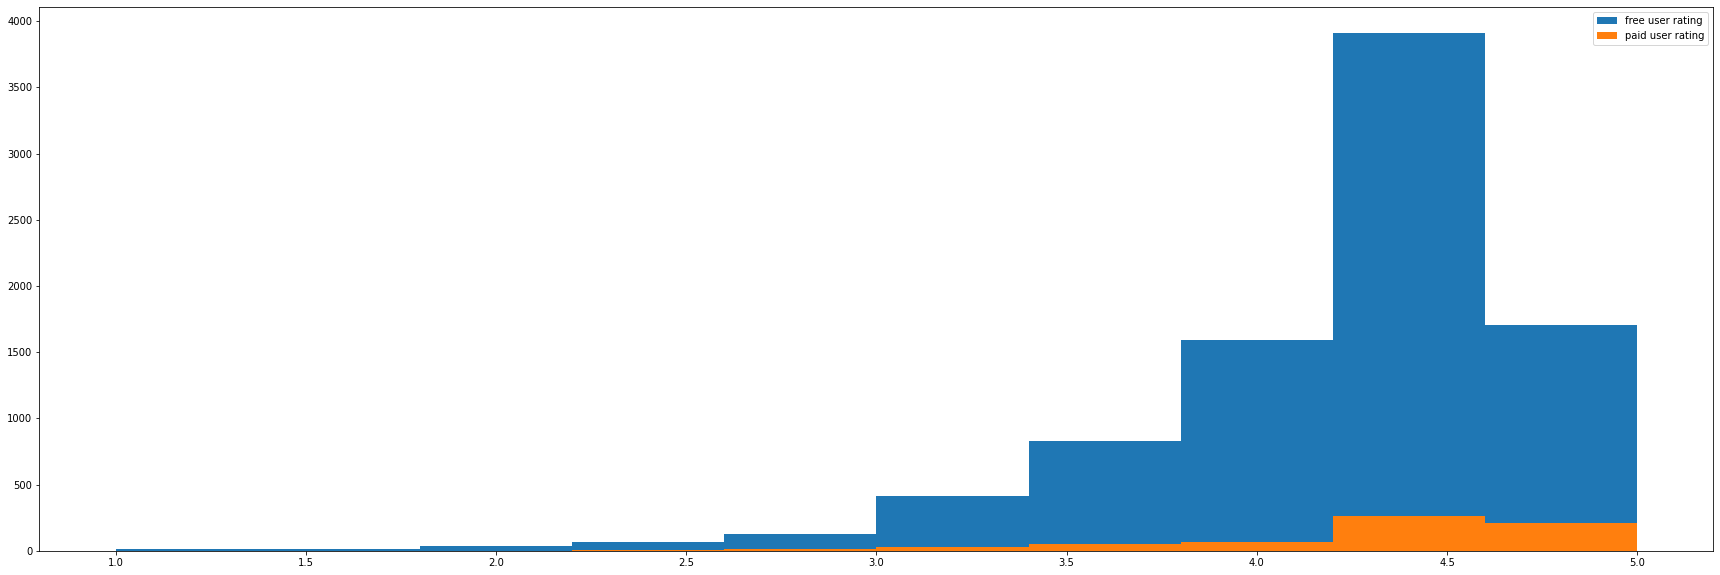

In [267]:
fig = plt.figure(figsize=(30, 10)) 
plt.hist(df1['Rating'].dropna(),label='free user rating')
plt.hist(df2['Rating'].dropna(),label='paid user rating')
plt.legend()

In [212]:
df1['Category'].unique()
#stats(df1,'Category').unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION', nan],
      dtype=object)

In [213]:
free_cat=stats(df1,'Category','categories','count').sort_values(by='categories')
free_cat

,categories,count
29,ART_AND_DESIGN,62
26,AUTO_AND_VEHICLES,82
32,BEAUTY,53
18,BOOKS_AND_REFERENCE,203
3,BUSINESS,446
30,COMICS,60
6,COMMUNICATION,360
17,DATING,227
20,EDUCATION,152
21,ENTERTAINMENT,147


In [214]:
paid_cat=stats(df2,'Category','categories','count').sort_values(by='categories')
paid_cat

,categories,count
22,ART_AND_DESIGN,3
20,AUTO_AND_VEHICLES,3
6,BOOKS_AND_REFERENCE,28
13,BUSINESS,14
7,COMMUNICATION,27
16,DATING,7
18,EDUCATION,4
24,ENTERTAINMENT,2
29,EVENTS,1
0,FAMILY,191


In [215]:
need_visual(free_cat,paid_cat,'categories','count')
#list1=df1['Category'].unique()
# print(list)
# list2=df1['Category'].value_counts()
# print(list2)

In [216]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Year Added', 'Month Added'],
      dtype='object')

In [217]:
free_android=stats(df1,'Android Ver','Android_versions','Total_apps').sort_values(by="Android_versions")
free_android

,Android_versions,Total_apps
27,1.0 and up,2
19,1.5 and up,14
13,1.6 and up,77
17,2.0 and up,26
26,2.0.1 and up,2
12,2.1 and up,107
31,2.2 - 7.1.1,1
11,2.2 and up,195
5,2.3 and up,580
8,2.3.3 and up,251


In [218]:
paid_android=stats(df2,'Android Ver','Android_versions','Total_apps').sort_values(by="Android_versions")
paid_android

,Android_versions,Total_apps
16,1.5 and up,6
7,1.6 and up,39
17,2.0 and up,6
18,2.0.1 and up,5
11,2.1 and up,27
5,2.2 and up,49
3,2.3 and up,72
10,2.3.3 and up,30
8,3.0 and up,34
23,3.1 and up,1


In [219]:
need_visual(free_android,paid_android,'Android_versions','Total_apps')

In [220]:
df1['Installs']

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10836         5,000+
10837           100+
10838         1,000+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 10040, dtype: object

In [221]:
install_free=stats(df1,'Installs','installs','count').sort_values(by='installs')
install_free

,installs,count
19,0+,4
18,1+,46
4,"1,000+",759
0,"1,000,000+",1555
17,"1,000,000,000+",58
11,10+,316
3,"10,000+",925
1,"10,000,000+",1249
6,100+,623
2,"100,000+",1079


In [222]:
install_paid=stats(df2,'Installs','installs','count').sort_values(by='installs')
install_paid

,installs,count
13,0+,10
10,1+,21
0,"1,000+",149
9,"1,000,000+",24
4,10+,70
1,"10,000+",129
14,"10,000,000+",3
2,100+,96
3,"100,000+",90
12,5+,12


In [223]:
need_visual(install_free,install_paid,'installs','count')

In [224]:
get_stats(data_review)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB
None


Shape of dataFrame is (64295, 5) 



Missing Values are:

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64


Data Types of feature are: 

App                        object
Translated_Review          object
Sentiment                  object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
dtype: object


In [225]:
labels_sentiment=data_review['Sentiment'].value_counts().index
values_sentiment=data_review['Sentiment'].value_counts().values

In [226]:
import plotly.express as px

In [227]:
fig=px.pie(names=labels_sentiment,values=values_sentiment)

In [228]:
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20, hole=.6,marker=dict(line=dict(color='#000000', width=4,)))
fig.update_layout(annotations=[dict(text='APP REVIEWS', x=0.50, y=0.5, font_size=30, showarrow=False)])
fig.show(renderer="colab")